In [13]:
import os
import cv2
import matplotlib.pyplot as plt
from xml.etree.ElementTree import parse

이미지 크기 정보 > 640 480
이미지 이름 > 01.jpg
이미지 경로 > ./01.jpg
dog


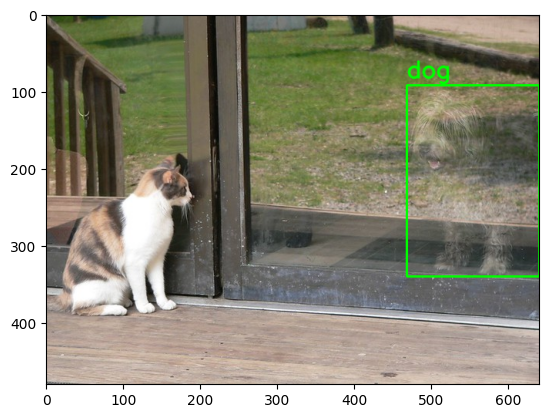

cat


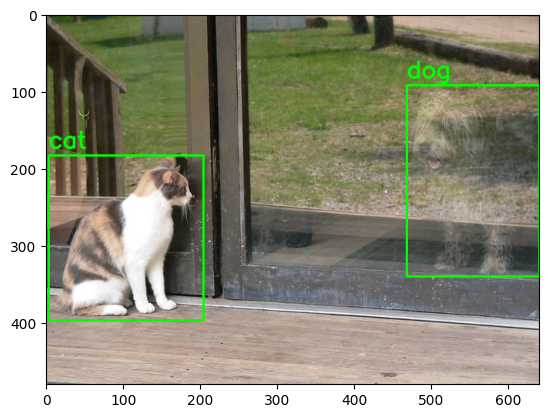

In [25]:
def xml_read(xml_path):

    root = parse(xml_path).getroot()

    image_info = root.findall('image')

    for image in image_info:
        bbox = image.findall('box')

        # image width height
        image_width = image.attrib['width']
        image_height = image.attrib['height']
        print('이미지 크기 정보 >' , image_width, image_height)

        #image name
        image_name = image.attrib['name']
        print('이미지 이름 >', image_name)
        image_name = os.path.join('./', image_name)
        print('이미지 경로 >', image_name)

        #image read 
        image = cv2.imread(image_name)
        #bgr - rgb
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        for box_info in bbox:
            label = box_info.attrib['label']
            print(label)
            
            #값 -> string 타입
            xtl = box_info.attrib['xtl']
            ytl = box_info.attrib['ytl']
            xbr = box_info.attrib['xbr']
            ybr = box_info.attrib['ybr']
            
            #string -> float
            xtl_f = float(xtl)
            ytl_f = float(ytl)
            xbr_f = float(xbr)
            ybr_f = float(ybr)


            # float -> int()
            xtl_i = int(xtl_f)
            ytl_i = int(ytl_f)
            xbr_i = int(xbr_f)
            ybr_i = int(ybr_f)

            #그리기 
            image = cv2.rectangle(image, (xtl_i, ytl_i), (xbr_i, ybr_i), (0, 255, 0),2)

            #라벨 추가
            image = cv2.putText(image, label, (xtl_i, ytl_i - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

            plt.imshow(image)
            plt.show()
            
xml_read('./annotations.xml')